In [36]:
from SupertypeTools import CGCalcMat, heatmap, SSE, hierarchical_cluster, Silhouette
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
# contact = [7,9,24,45,59,62,63,66,67,69,70,73,74,76,77,80,81,84,95,97,99,114,116,118,143,147,150,152,156,158,159,163,167,171] #MHCpan
# contactA = [5,7,9,24,25,34,45,59,63,66,67,70,74,77,80,81,84,97,99,113,114,116,123,133,143,146,147,152,155,156,159,160,163,167,171]
# contactB = [5,7,8,9,24,45,59,62,63,65,66,67,70,73,74,76,77,80,81,84,95,97,99,114,116,123,143,146,147,152,155,156,159,160,163,167,171]

# weight = {3:[7,9,24,45,62,63,66,67,70,74,77,80,81,84,95,97,99,116,118,143,147,159]}

#Hanneke W.M. van Deutekom and Can Kesmir 2015
# contact = [7,9,24,45,59,63,66,67,69,70,74,76,77,80,95,97,99,114,116,152,156,158,163,167,171]
# weight = {9.9:[63],7.6:[67],5.8:[116],5.4:[9],4.7:[97],4.6:[152],3.8:[167],3.7:[156],3.6:[74],3.2:[70],3:[80],2.9:[171],2.8:[45],2.7:[66],2.7:[77],2.4:[76],2.3:[114],2.1:[99],1.5:[163],1.5:[95],1.4:[59],1.4:[158],1.2:[69],1.2:[24],1:[7]}

## Tuning number of clusters

#### functions

In [37]:
def Tuning_N(StructureDistMat, BADistMat, Nmin, Nmax, StructSilhouette=False, BASilhouette=False):
    """
    return (StructSSE, BASSE, StructSilhouette, BASilhouette)
    """
    StructSSE = []
    BASSE = []
    Silhouette_S = []
    Silhouette_BA = []

    # dist_list = []

    for i in range(Nmin, Nmax+1):

        # initialize optional parameters
        BA_err = 'NA'
        SilhouetteScore = 'NA'
        BASilhouetteScore = 'NA'

        cluster, _ = hierarchical_cluster(StructureDistMat, N=i, L='complete', threshold=None)
        #complete average single
        groups = [i[1].index.tolist() for i in cluster.groupby(cluster)]
        # print(groups)
        
        Struct_err = SSE(StructureDistMat, groups)
        StructSSE.append(Struct_err)

        if BADistMat is not None:
            BA_err = SSE(BADistMat, groups)
            BASSE.append(BA_err)

        if StructSilhouette:
            SilhouetteScore = Silhouette(StructureDistMat, groups)
            Silhouette_S.append(SilhouetteScore)

        if BASilhouette:
            BASilhouetteScore = Silhouette(BADistMat, groups)
            Silhouette_BA.append(BASilhouetteScore)

        # print(f"N={i}  SE: {Struct_err} / BE: {BA_err} / SS: {SilhouetteScore} / BS: {BASilhouetteScore}")

        # dist_list.append(dist)

    return StructSSE, BASSE, Silhouette_S, Silhouette_BA

def elbow_plot(Struct_Mat, BA_Mat, Additional_Bar_group:list=None, Nmin=1, Nmax=12):
    
    SSE_struct, SSE_BA = Tuning_N(Struct_Mat, BA_Mat, Nmin, Nmax)
    xx = range(Nmin, Nmax+1)

    lines = []
    labels = []

    fig, ax1 = plt.subplots(figsize=(6,10))
    ax2 = ax1.twinx()

    line1, = ax1.plot(xx, SSE_BA, c='b', marker='^', mfc='None', mec='b', ms='8', mew=3, alpha=0.6, label="NetMHCpan SSE")
    line2, = ax2.plot(xx, SSE_struct, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, alpha=0.6, label="Structure SSE")
    lines.append(line1)
    labels.append("NetMHCpan SSE")
    lines.append(line2)
    labels.append("Structure SSE")

    ax1.set_xlabel('Number of clusters', fontsize=20)
    ax1.set_xticks(range(1,Nmax+1,2))
    ax1.tick_params(axis='x', labelsize=16)
    
    ax1.set_ylabel('Binding peptide SSE', color='tab:blue', fontsize=20)
    ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=16)

    ax2.set_ylabel('Structure distance SSE', color='tab:green', fontsize=20)
    ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=16)

    if Additional_Bar_group:
        for group in Additional_Bar_group:
            lines.append(ax1.bar(group[0], group[1], alpha=0.6, label=group[2], linewidth=2, edgecolor='b'))
            labels.append(f"{group[2]} (n={group[0]})")

    # ax1.legend()
    # ax2.legend()
    ax1.legend(lines, labels, prop={"size":16})
    ax1.grid(linestyle='--')

    # fig.legend()
    plt.show()

    return

BA_Mat = pd.read_csv("../BA_pred/top10_matrix.csv", index_col=0)

In [38]:
# from sklearn.model_selection import ParameterGrid
# grid = ParameterGrid({'sigma':[0.005,0.01,0.02,0.03,0.04,0.05,0.075,0.1],
#                     'w':[2,10,20,40,80,150]})
# for param in grid:

#     sigma=param['sigma']
#     w=param['w']
#     print(sigma, w)
#     AMat = CGCalcMat("../HLA1_models/CF_relaxed/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-A.list", sigma=sigma, w=w)
#     _, ASSE_BA, _, _ = Tuning_N(AMat, BA_Mat, 6, 6, StructSilhouette=False, BASilhouette=False)

#     BMat = CGCalcMat("../HLA1_models/CF_relaxed/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-B.list", sigma=sigma,w=w)
#     _, BSSE_BA, _, _ = Tuning_N(BMat, BA_Mat, 6, 6, StructSilhouette=False, BASilhouette=False)

#     # CMat = CGCalcMat("../HLA1_models/CF_relaxed/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-C.list", sigma=sigma, w=w)
#     # _, CSSE_BA, _, _ = Tuning_N(CMat, BA_Mat, 2, 2, StructSilhouette=False, BASilhouette=False)

# Doytchinova SSE:
# 7.441962380952381
# 16.95428888198758
# 3.6950365384615385

# Sidney SSE:
# 5.025194318181818
# 11.338682679738561

In [39]:
# 0.01 80
# 0.02 20
# 0.04 5

sigma=0.1
w=4

### HLA-A

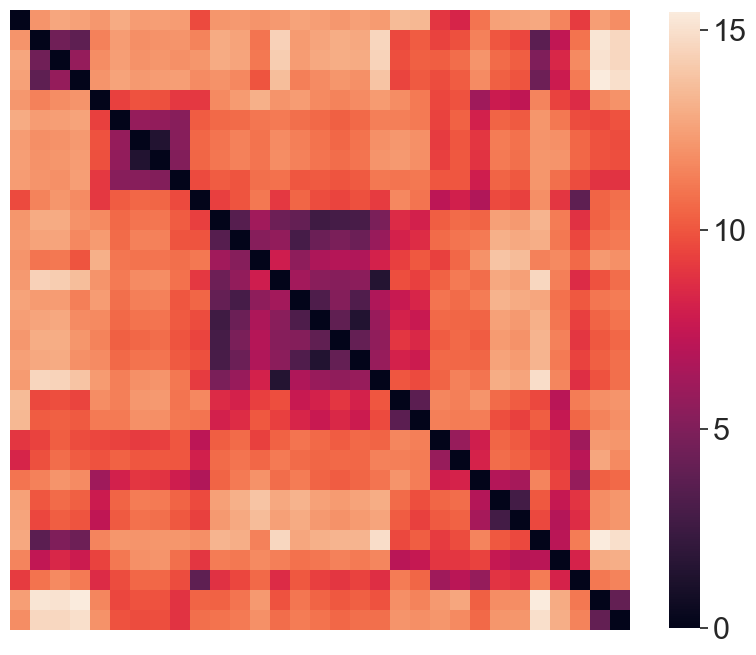

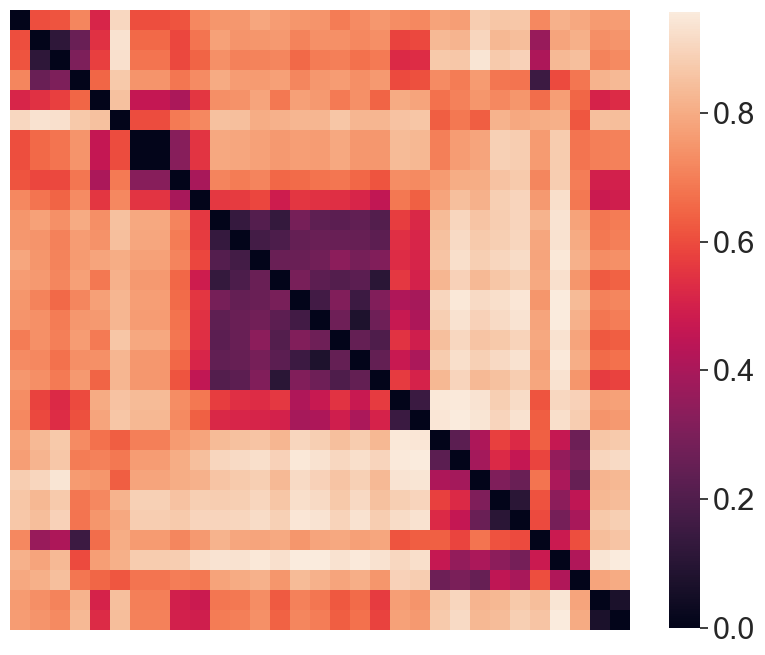

In [40]:
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]
A_label = ['A*01:01', 'A*26:01', 'A*26:02', 'A*26:03', 'A*29:02', 'A*30:01', 'A*30:02', 'A*30:03', 'A*30:04', 'A*32:01', 'A*02:01', 'A*02:02', 'A*02:03', 'A*02:04', 'A*02:05', 'A*02:06', 'A*02:07', 'A*02:14', 'A*02:17', 'A*68:02', 'A*69:01', 'A*03:01', 'A*11:01', 'A*31:01', 'A*33:01', 'A*33:03', 'A*66:01', 'A*68:01', 'A*74:01', 'A*23:01', 'A*24:02']

AMat = CGCalcMat("../HLA1_models/CF_relaxed/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-A.list", sigma=sigma, w=w)
# AMat = CGCalcMat("../HLA1_models/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-A.list", contact=contact, weight=weight)
# heatmap(AMat, order=A_order, label=A_label, line=False, shrink=0.8, labelsize=12)
# heatmap(BA_Mat, order=A_order, label=A_label, line=False, shrink=0.8, labelsize=12)

sn.set(font_scale=2)
heatmap(AMat, order=A_order, line=False, shrink=0.8, labelsize=24, ticks=[0, 5, 10, 15, 20])
heatmap(BA_Mat, order=A_order, line=False, shrink=0.8, labelsize=24, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])

In [41]:
# Sidney
A_Sidney = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A30_01'],
    ['A29_02'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]

# Doytchinova
A_Doytchinova = [
    ['A01_01','A29_02','A30_01','A30_02','A30_03','A30_04','A32_01','A03_01','A11_01','A31_01','A33_01','A33_03','A66_01','A68_01','A74_01'],
    ['A26_01','A26_02','A26_03','A02_01','A02_02','A02_03','A02_04','A02_05','A02_06','A02_07','A02_14','A02_17','A68_02','A69_01'],
    ['A23_01','A24_02']
]
# elbow_plot(Mat, BA_Mat)
ASidney_SSE = SSE(BA_Mat, A_Sidney)
ADoytchinova_SSE = SSE(BA_Mat, A_Doytchinova)

ASidney_Silhouette = Silhouette(BA_Mat, A_Sidney)
ADoytchinov_Silhouette = Silhouette(BA_Mat, A_Doytchinova)

ASSE_struct, ASSE_BA, ASilhouette_struct, ASilhouette_struct_BA = Tuning_N(AMat, BA_Mat, 1, 12, StructSilhouette=True, BASilhouette=True)

# elbow_plot(AMat, BA_Mat, [(len(A_Doytchinova),ADoytchinova_SSE, "Doytchinova"), (len(A_Sidney),ASidney_SSE, "Sidney")])
# print(f"Sidney SSE:{ASidney_SSE}, Silhouette_coefficient:{ASidney_Silhouette}\nDoytchinova SSE:{ADoytchinova_SSE}, Silhouette_coefficient:{ADoytchinov_Silhouette}")
# elbow_plot(Mat, BA_Mat)

### HLA-B

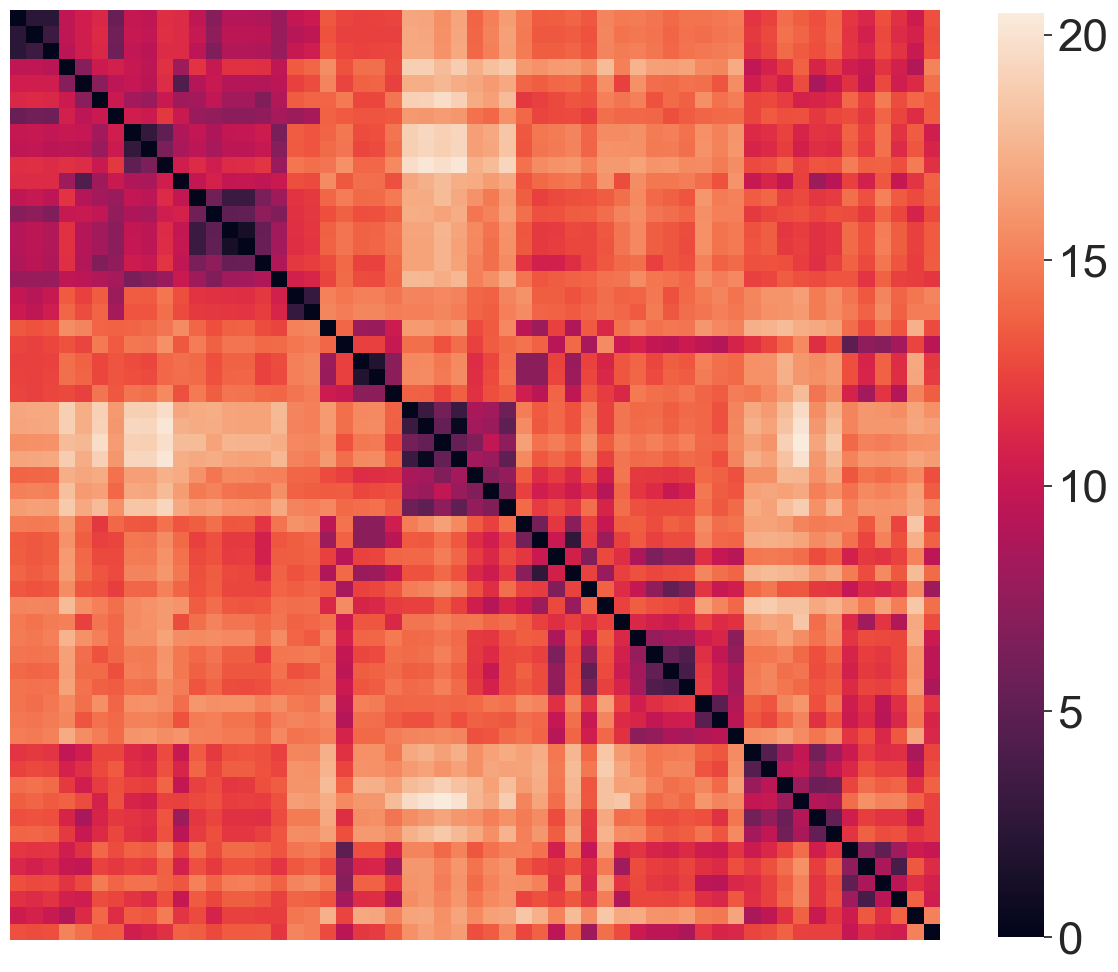

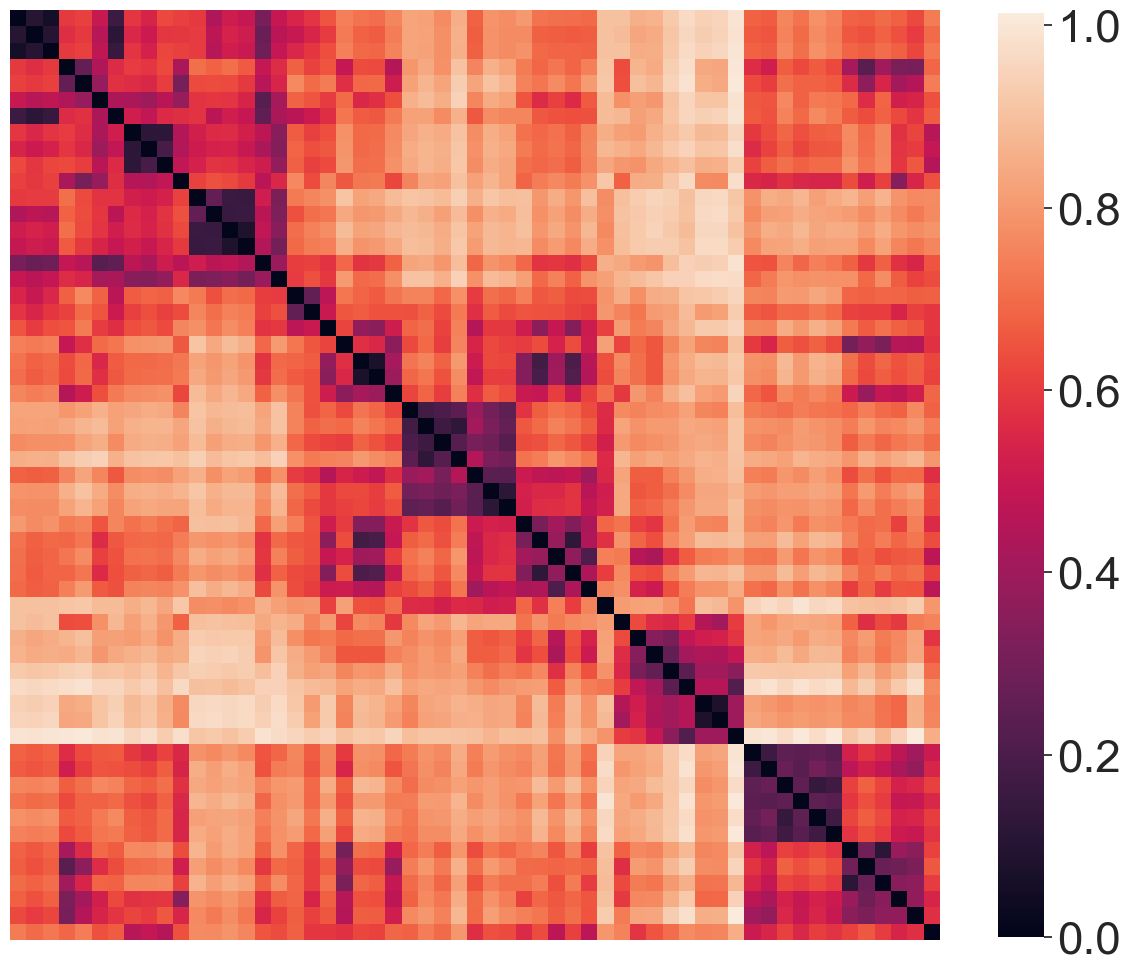

In [42]:
B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
B_label = ['B*07:02','B*07:03','B*07:05','B*15:08','B*35:01','B*35:03','B*42:01','B*51:01','B*51:02','B*51:03','B*53:01','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01','B*08:01','B*08:02','B*14:02','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06','B*27:07','B*27:09','B*38:01','B*39:01','B*39:02','B*39:09','B*48:01','B*73:01','B*18:01','B*37:01','B*40:01','B*40:02','B*40:06','B*44:02','B*44:03','B*45:01','B*15:16','B*15:17','B*57:01','B*57:02','B*58:01','B*58:02','B*15:01','B*15:02','B*15:12','B*15:13','B*46:01','B*52:01']

BMat = CGCalcMat("../HLA1_models/CF_relaxed/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-B.list", sigma=sigma,w=w)
# BMat = CGCalcMat("../HLA1_models/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-B.list", contact=contact, weight=weight)
# heatmap(BMat, order=B_order, size=(16,16), label=B_label, line=False, shrink=0.8, labelsize=12)
# heatmap(BA_Mat, order=B_order, size=(16,16), label=B_label, line=False, shrink=0.8, labelsize=12)

sn.set(font_scale=3)
heatmap(BMat, order=B_order, size=(15,15), line=False, shrink=0.8, labelsize=12, ticks=[0, 5, 10, 15, 20])
heatmap(BA_Mat, order=B_order, size=(15,15), line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])

In [43]:
# Sidney
B_Sidney = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
# Doytchinova
B_Doytchinova = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01','B08_01','B14_02','B15_09','B15_10','B15_18','B39_01','B39_09','B73_01','B18_01','B15_02'],
    ['B51_01','B51_02','B51_03','B53_01','B08_02','B27_02','B38_01','B44_02','B44_03','B57_01','B57_02','B58_01','B58_02','B52_01'],
    ['B15_03','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B39_02','B48_01','B37_01','B40_01','B40_02','B40_06','B45_01','B15_16','B15_17','B15_01','B15_12','B15_13','B46_01']
]

BSidney_SSE = SSE(BA_Mat, B_Sidney)
BDoytchinova_SSE = SSE(BA_Mat, B_Doytchinova)

BSidney_Silhouette = Silhouette(BA_Mat, B_Sidney)
BDoytchinov_Silhouette = Silhouette(BA_Mat, B_Doytchinova)

BSSE_struct, BSSE_BA, BSilhouette_struct, BSilhouette_struct_BA = Tuning_N(BMat, BA_Mat, 1, 12, StructSilhouette=True, BASilhouette=True)
# elbow_plot(BMat, BA_Mat, [(len(B_Doytchinova),BDoytchinova_SSE, "Doytchinova"), (len(B_Sidney),BSidney_SSE, "Sidney")])
# print(f"Sidney SSE:{BSidney_SSE}, Silhouette_coefficient:{BSidney_Silhouette}\nDoytchinova SSE:{BDoytchinova_SSE}, Silhouette_coefficient:{BDoytchinov_Silhouette}")

### HLA-C

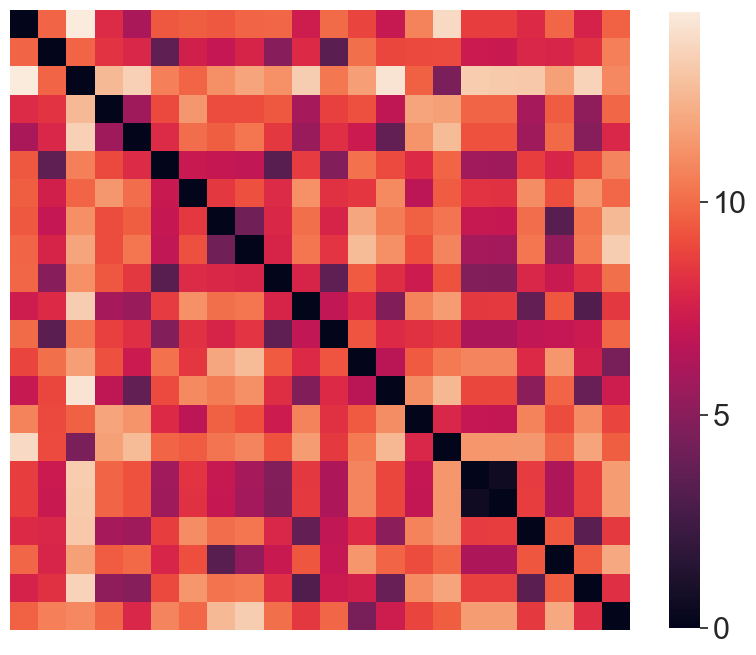

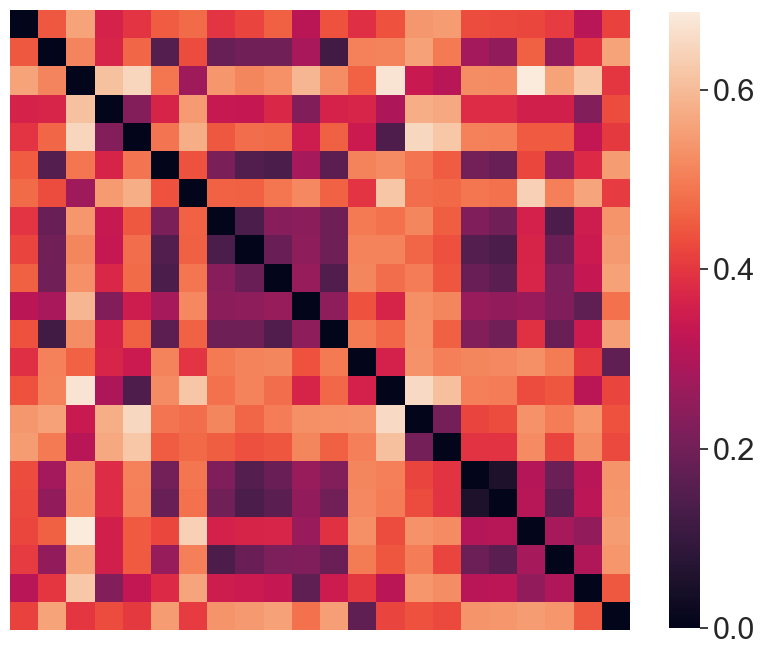

In [44]:
C_order = [
    ['C01_02','C03_02','C07_02','C08_01','C08_02','C12_02','C14_02','C16_01','C16_04'],
    ['C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
]
C_label = ['C*01:02','C*03:02','C*07:02','C*08:01','C*08:02','C*12:02','C*14:02','C*16:01','C*16:04','C*02:02','C*03:07','C*03:15','C*04:01','C*05:01','C*06:02','C*07:07','C*12:04','C*12:05','C*15:02','C*16:02','C*17:01','C*18:01']

CMat = CGCalcMat("../HLA1_models/CF_relaxed/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-C.list", sigma=sigma, w=w)
# CMat = CGCalcMat("../HLA1_models/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-C.list", contact=contact, weight=weight)
# heatmap(CMat, order=C_order, label=C_label, line=False, shrink=0.8, labelsize=12)
# heatmap(BA_Mat, order=C_order, label=C_label, line=False, shrink=0.8, labelsize=12)

sn.set(font_scale=2)
heatmap(CMat, order=C_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 5, 10, 15, 20])
heatmap(BA_Mat, order=C_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])

In [45]:
# Doytchinova
C_Doytchinova = [
    ['C01_02','C03_02','C07_02','C08_01','C12_02','C14_02','C16_01','C16_04'],
    ['C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
]
CDoytchinova_SSE = SSE(BA_Mat, C_Doytchinova)

CDoytchinov_Silhouette = Silhouette(BA_Mat, C_Doytchinova)

CSSE_struct, CSSE_BA, CSilhouette_struct, CSilhouette_struct_BA = Tuning_N(CMat, BA_Mat, 1, 12, StructSilhouette=True, BASilhouette=True)
# elbow_plot(CMat, BA_Mat, [(len(C_Doytchinova),CDoytchinova_SSE, "Doytchinova")])
# print(f"Doytchinova SSE:{CDoytchinova_SSE}, Silhouette_coefficient:{CDoytchinov_Silhouette}")

In [46]:
# random clustering as baseline
import random
import numpy as np

A_ref_alleles = ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01',
'A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01',
'A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01',
'A23_01', 'A24_02']
B_ref_alleles = ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01',
'B08_01','B08_02',
'B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01',
'B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01',
'B15_16','B15_17','B57_01','B57_02','B58_01','B58_02',
'B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
C_ref_alleles = ['C01_02','C03_02','C07_02','C08_01','C08_02','C12_02','C14_02','C16_01','C16_04',
'C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
ALL_REF = [A_ref_alleles, B_ref_alleles, C_ref_alleles]

RAND_BA_SSE = []
RAND_BA_Silhouette = []
for ref_alleles in ALL_REF:
    mean_sse = []
    std_sse = []
    mean_silhouette = []
    std_silhouette = []

    for i in range(1, 13):
        n_cluster_sse = []
        n_cluster_silhouette = []
        for _ in range(5):
            random.shuffle(ref_alleles)
            rand_split = np.array_split(ref_alleles, i)
            # print(len(rand_split), ref_alleles)
            # breakpoint()
            n_cluster_sse.append(SSE(BA_Mat, rand_split))
            n_cluster_silhouette.append(Silhouette(BA_Mat, rand_split))
        mean_sse.append(np.mean(n_cluster_sse))
        std_sse.append(np.std(n_cluster_sse))

        mean_silhouette.append(np.mean(n_cluster_silhouette))
        std_silhouette.append(np.std(n_cluster_silhouette))

    RAND_BA_SSE.append((mean_sse, std_sse))
    RAND_BA_Silhouette.append((mean_silhouette, std_silhouette))

In [47]:
# clustering of BA matrix as best
BA_SSE = []
BA_Silhouette = []
for ref_alleles in ALL_REF:
    # mean_sse = []
    # mean_silhouette = []
    BA_ref_Mat = BA_Mat.loc[ref_alleles][ref_alleles]
    SSE_BA, _, Silhouette_BA, _ = Tuning_N(BA_ref_Mat, None, 1, 12, StructSilhouette=True, BASilhouette=False)

    BA_SSE.append(SSE_BA)
    BA_Silhouette.append(Silhouette_BA)

### combine all three subplots

#### SSE plot

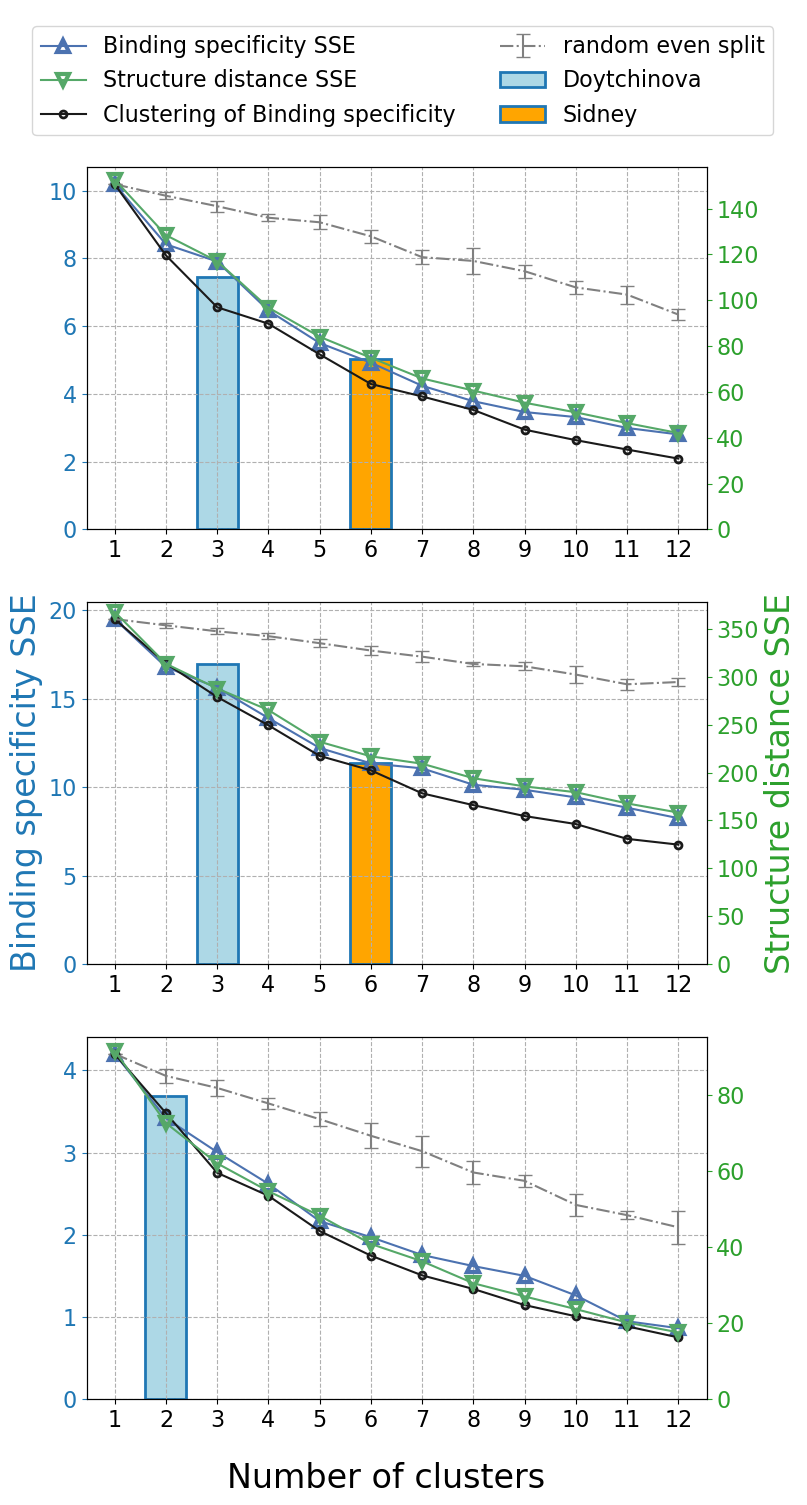

In [64]:
SSE_BA_list = [ASSE_BA, BSSE_BA, CSSE_BA]
SSE_struct_list = [ASSE_struct, BSSE_struct, CSSE_struct]
SSE_other = [((len(A_Doytchinova),ADoytchinova_SSE, "Doytchinova"), (len(A_Sidney),ASidney_SSE, "Sidney")), 
((len(B_Doytchinova),BDoytchinova_SSE, "Doytchinova"), (len(B_Sidney),BSidney_SSE, "Sidney")), 
((len(C_Doytchinova),CDoytchinova_SSE, "Doytchinova"),)]

xx = range(1, 13)
plt.style.use('default')
fig, axes = plt.subplots(3, 1, figsize=(8,16))
i=1
for ax1, SSE_BA, SSE_struct, SSE_random, SSE_BABA, Additional_Bar_group in zip(axes, SSE_BA_list, SSE_struct_list, RAND_BA_SSE, BA_SSE, SSE_other):
# for ax1, SSE_BA, SSE_struct, Additional_Bar_group in zip(axes, SSE_BA_list, SSE_struct_list, SSE_other):
    ax2 = ax1.twinx()

    # line plots
    line1, = ax1.plot(xx, SSE_BA, c='b', marker='^', mfc='None', mec='b', ms='8', mew=3, alpha=1, label="Binding specificity SSE")
    line2, = ax2.plot(xx, SSE_struct, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, alpha=1, label="Structure distance SSE")


    # random splits
    randoms = ax1.errorbar(xx, SSE_random[0], yerr=SSE_random[1], alpha=1, ls='-.', capsize=5, color='gray', label="random even split")
    line3, = ax1.plot(xx, SSE_BABA, c='k', marker='o', mfc='None', mec='k', ms='5', mew=2, alpha=1, label="Binding specificity SSE on BA")

    # ax1.set_xlabel('Number of clusters', fontsize=20)
    ax1.set_xticks(range(1,13,1))
    ax1.tick_params(axis='x', labelsize=16)

    if i == 2:
        lines = []
        labels = []
        lines.append(line1)
        labels.append("Binding specificity SSE")
        lines.append(line2)
        labels.append("Structure distance SSE")
        lines.append(line3)
        labels.append("Clustering of Binding specificity")
        lines.append(randoms)
        labels.append("random even split")

        ax1.set_ylabel('Binding specificity SSE', color='tab:blue', fontsize=24)
        ax2.set_ylabel('Structure distance SSE', color='tab:green', fontsize=24)
    

    ax1.tick_params(axis='y', colors='tab:blue', labelsize=16)
    ax2.tick_params(axis='y', colors='tab:green', labelsize=16)
    ax2.set_ylim([0,None])

    # bar plots
    for group, color in zip(Additional_Bar_group, ["lightblue","orange"]):
        # print(group)
        # lines.append(ax1.bar(group[0], group[1], alpha=0.6, label=group[2], linewidth=2, edgecolor='b'))
        # labels.append(f"{group[2]} (n={group[0]})")
        bar = ax1.bar(group[0], group[1], color=color, label=group[2], linewidth=2, edgecolor='tab:blue')

        if i == 2:
            lines.append(bar)
            labels.append(group[2])

    # ax1.legend(lines, labels, prop={"size":16}, loc=1)
    ax1.grid(linestyle='--')
    i += 1

fig.legend(lines, labels, prop={"size":16}, loc=(0.04,0.91), ncol=2)
fig.supxlabel("Number of clusters", fontsize=24, y=0.05)

plt.show()

#### silhouette plot

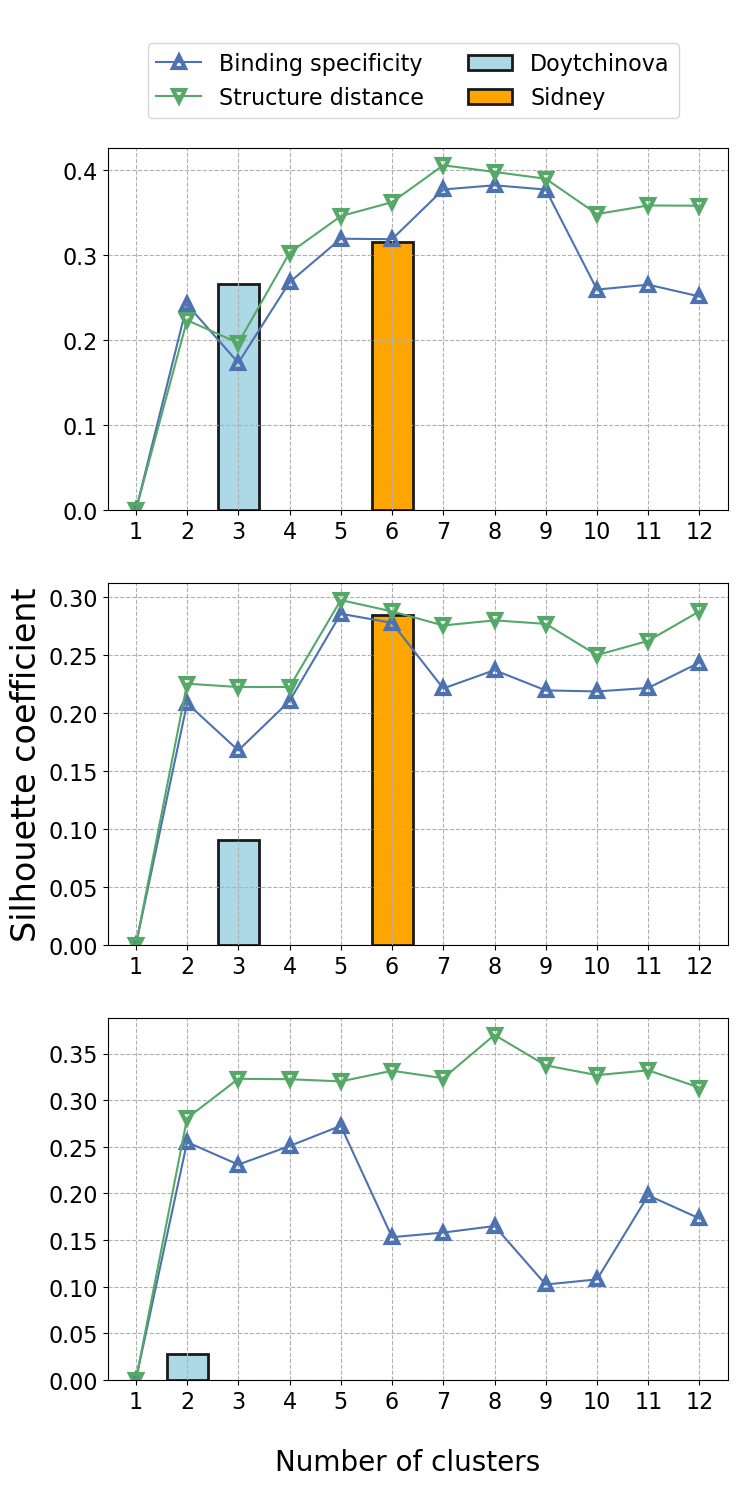

In [49]:
Silhouette_BA_list = [ASilhouette_struct_BA, BSilhouette_struct_BA, CSilhouette_struct_BA]
Silhouette_struct_list = [ASilhouette_struct, BSilhouette_struct, CSilhouette_struct]
Silhouette_other = [((len(A_Doytchinova),ADoytchinov_Silhouette, "Doytchinova"), (len(A_Sidney),ASidney_Silhouette, "Sidney")),
                    ((len(B_Doytchinova),BDoytchinov_Silhouette, "Doytchinova"), (len(B_Sidney),BSidney_Silhouette, "Sidney")),
                    ((len(C_Doytchinova),CDoytchinov_Silhouette, "Doytchinova"),)]

xx = range(1, 13)

fig, axes = plt.subplots(3, 1, figsize=(8,16))
i=1
for ax1, SSE_BA, SSE_struct, SSE_random, Additional_Bar_group in zip(axes, Silhouette_BA_list, Silhouette_struct_list, RAND_BA_Silhouette, Silhouette_other):

    # line plots
    line1, = ax1.plot(xx, SSE_BA, c='b', marker='^', mfc='None', mec='b', ms='8', mew=3, label="Binding peptide")
    line2, = ax1.plot(xx, SSE_struct, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, label="Structure distance")

    ax1.set_xticks(range(1,13,1))
    ax1.tick_params(axis='x', labelsize=16)

    if i == 2:
        lines = []
        labels = []
        lines.append(line1)
        labels.append("Binding specificity")
        lines.append(line2)
        labels.append("Structure distance")

        ax1.set_ylabel('Silhouette coefficient', fontsize=24)
    

    ax1.tick_params(axis='y', labelsize=16)

    # bar plots
    for group, color in zip(Additional_Bar_group, ["lightblue","orange"]):

        bar = ax1.bar(group[0], group[1], color=color, label=group[2], linewidth=2, edgecolor='k')

        if i == 2:
            lines.append(bar)
            labels.append(group[2])

    ax1.grid(linestyle='--')
    i += 1

fig.legend(lines, labels, prop={"size":16}, loc=(0.2,0.92), ncol=2)
fig.supxlabel("Number of clusters", fontsize=20, y=0.05)

plt.show()

## All reference alleles

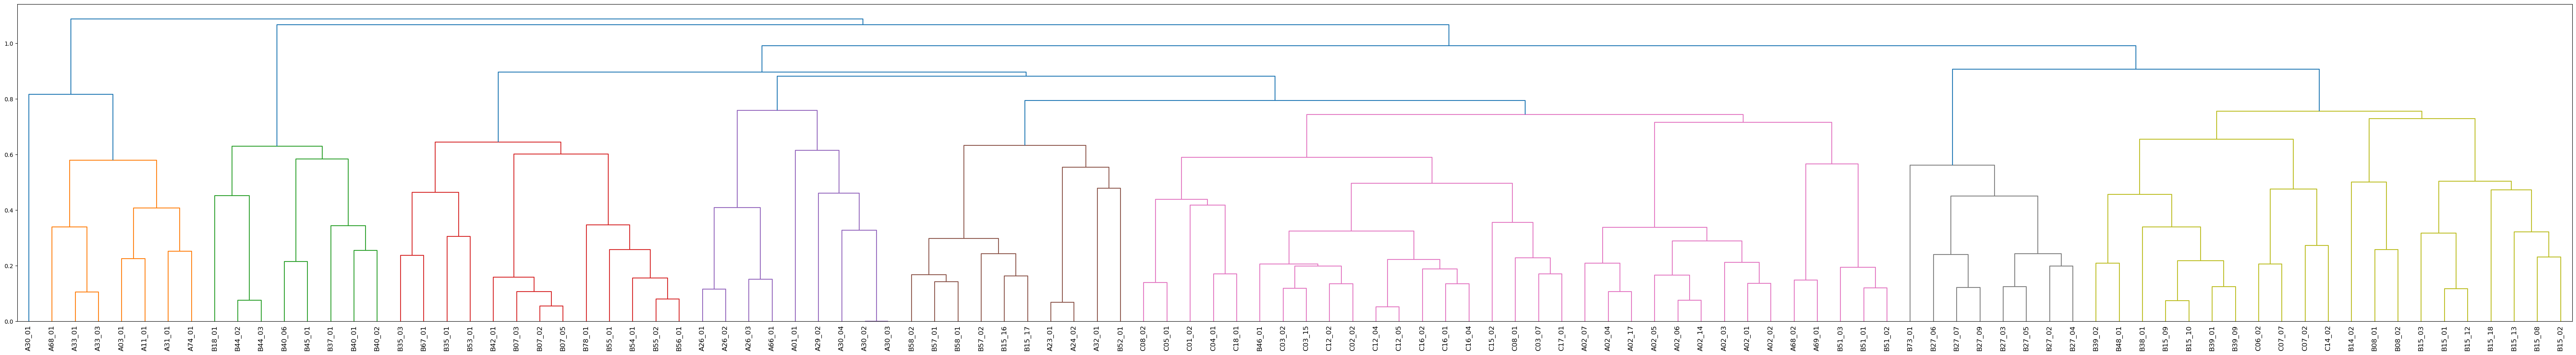

In [50]:
# Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/cr.list", sigma=0.1, w=4)
_ = hierarchical_cluster(BA_Mat, N=None, L='complete', threshold=1, plot_dendro=True)

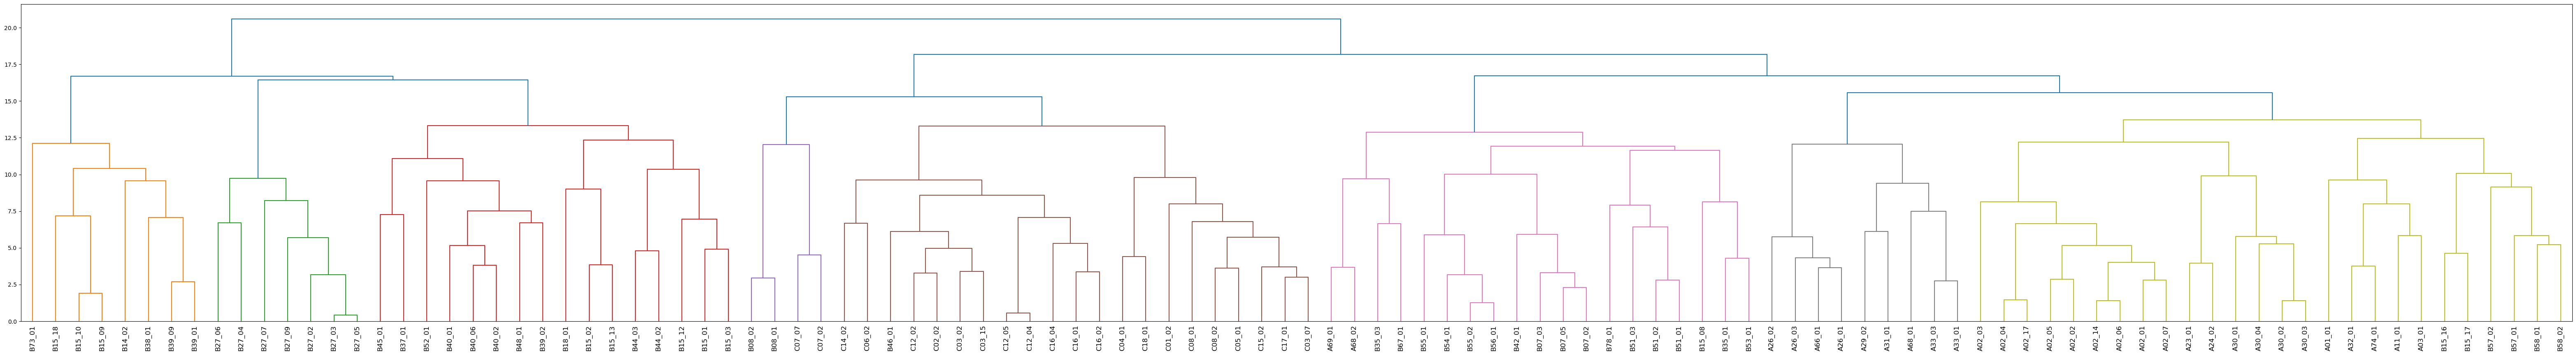

In [51]:
# refMat = CGCalcMat("../HLA1_models/CF_relaxed/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-ABC.list", sigma=sigma, w=w)
# refMat.to_csv("HLA-ABCref_cf_relaxed.csv")

refMat = pd.read_csv("HLA-ABCref_cf_relaxed.csv", index_col=0)
_ = hierarchical_cluster(refMat, N=None, L='complete', threshold=1, plot_dendro=True)

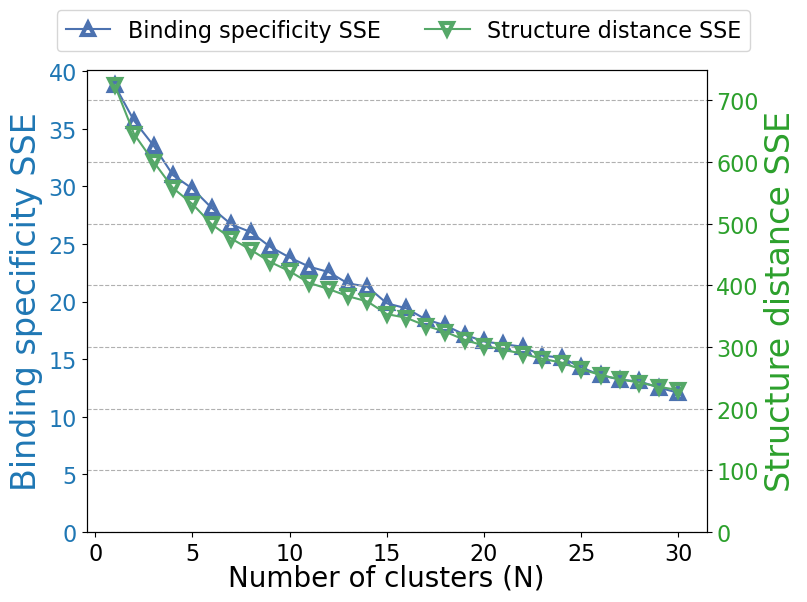

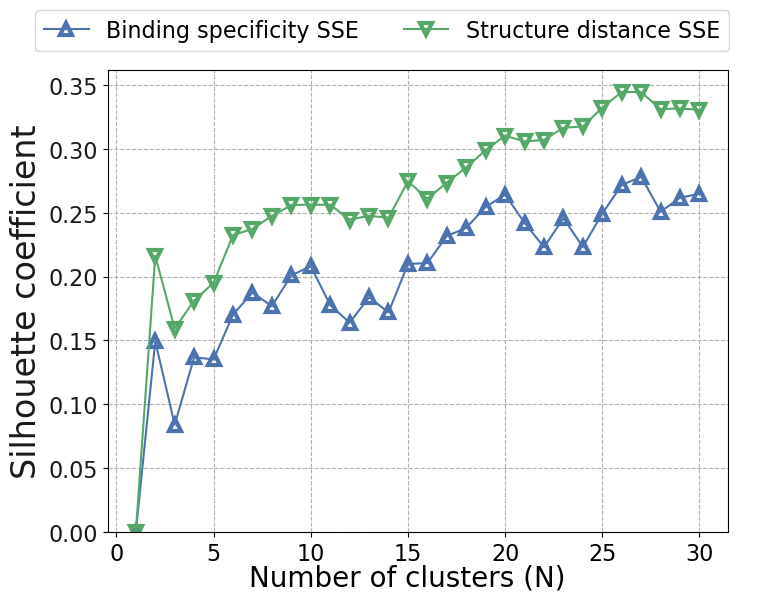

In [52]:
# groups = [i[1].index.tolist() for i in cluster.groupby(cluster)]
# Silhouette(BA_Mat, groups)
ALL_SSE, ALL_BA_SSE, ALL_Silhouette, ALL_BA_Silhouette = Tuning_N(refMat, BA_Mat, 1, 30, StructSilhouette=True, BASilhouette=True)
xx = range(1, 31)
# SSE elbow plot
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()

line1, = ax1.plot(xx, ALL_BA_SSE, c='b', marker='^', mfc='None', mec='b', ms=8, mew=3, label="Binding specificity SSE")
line2, = ax2.plot(xx, ALL_SSE, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, label="Structure distance SSE")

ax1.set_ylabel('Binding specificity SSE', color='tab:blue', fontsize=24)
ax2.set_ylabel('Structure distance SSE', color='tab:green', fontsize=24)

ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=16)

ax1.set_ylim([0,None])
ax2.set_ylim([0,None])

fig.supxlabel('Number of clusters (N)', fontsize=20)
plt.grid(linestyle='--')
fig.legend([line1, line2], ["Binding specificity SSE", "Structure distance SSE"], prop={"size":16}, loc=9, ncol=2)
plt.show()

# Silhouette plot
fig, ax1 = plt.subplots(figsize=(8,6))

line1, = ax1.plot(xx, ALL_BA_Silhouette, c='b', marker='^', mfc='None', mec='b', ms=8, mew=3, label="Binding specificity SSE")
line2, = ax1.plot(xx, ALL_Silhouette, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, label="Structure distance SSE")

ax1.set_ylabel('Silhouette coefficient', color='k', fontsize=24)

ax1.tick_params(axis='y', labelcolor='k', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)

ax1.set_ylim([0,None])

fig.supxlabel('Number of clusters (N)', fontsize=20)
plt.grid(linestyle='--')
fig.legend([line1, line2], ["Binding specificity SSE", "Structure distance SSE"], prop={"size":16}, loc=9, ncol=2)
plt.show()

## All HLA I alleles

In [53]:
# Mat = CGCalcMat("../HLA1_models/CG_DAT", "../Figures/Figure4_total_clustering/Fig4.list", contact=contact, weight=weight, sigma=0.1, w=4)
# Mat = CGCalcMat("../HLA1_models/CF_relaxed/CG_DAT", "../Figures/Figure4_total_clustering/Fig4.list",sigma=sigma, w=w)
# print(Mat)
# heatmap(Mat, order=None, line=False, size=(80,80), shrink=0.8, aspect=40, pad=0.02)
# Matrix2Dendro(Mat, "HLA-I_cg.newick")
# Mat.to_csv("HLA-I_cf_relaxed.csv")

In [54]:
Mat = pd.read_csv("HLA-I_cf_relaxed.csv", index_col=0)

SSE_struct, _, SilhouetteScore, _ = Tuning_N(Mat, None, 1, 30, StructSilhouette=True)

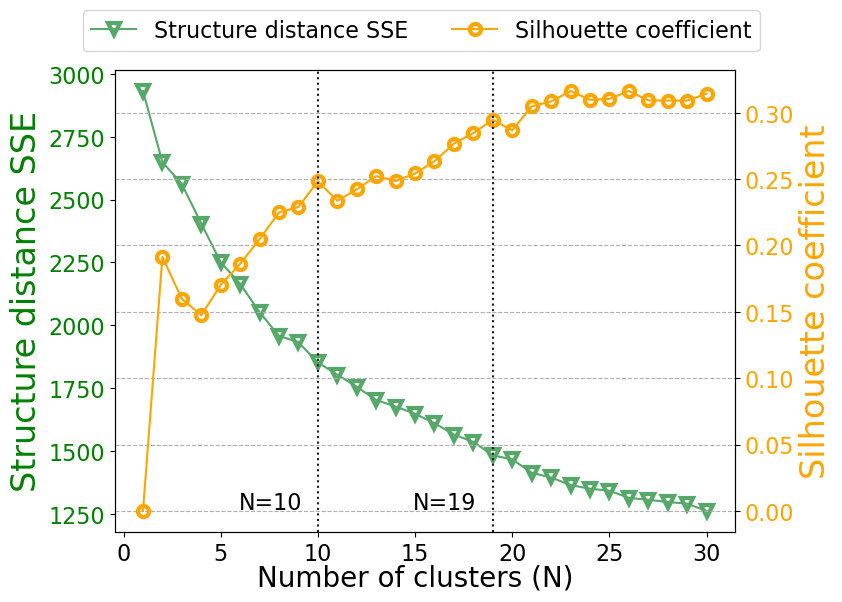

In [55]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()

line1, = ax1.plot(xx, SSE_struct, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, label="Structure distance SSE")
line2, = ax2.plot(xx, SilhouetteScore, c='orange', marker='o', mfc='None', mec='orange', ms=8, mew=3, label="Silhouette coefficient")

ax1.set_ylabel('Structure distance SSE', color='green', fontsize=24)
ax2.set_ylabel('Silhouette coefficient', color='orange', fontsize=24)
# plt.legend()
# plt.tick_params('x', labelsize=16)
# plt.tick_params('y', labelsize=16)

ax1.tick_params(axis='y', labelcolor='green', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelcolor='orange', labelsize=16)

fig.supxlabel('Number of clusters (N)', fontsize=20)
# plt.ylabel('Structure Distance SSE', fontsize=20)
plt.axvline(x=10, c='k', linestyle=':')
plt.annotate('N=10', xy=(0.20, 0.05), xycoords='axes fraction', fontsize=16)
plt.axvline(x=19, c='k', linestyle=':')
plt.annotate('N=19', xy=(0.48, 0.05), xycoords='axes fraction', fontsize=16)
# plt.axvline(x=13, c='k', linestyle=':')
# plt.annotate('N=13', xy=(0.48, 0.05), xycoords='axes fraction', fontsize=16)
plt.grid(linestyle='--')

fig.legend([line1, line2], ["Structure distance SSE", "Silhouette coefficient"], prop={"size":16}, loc=9, ncol=2)

plt.show()

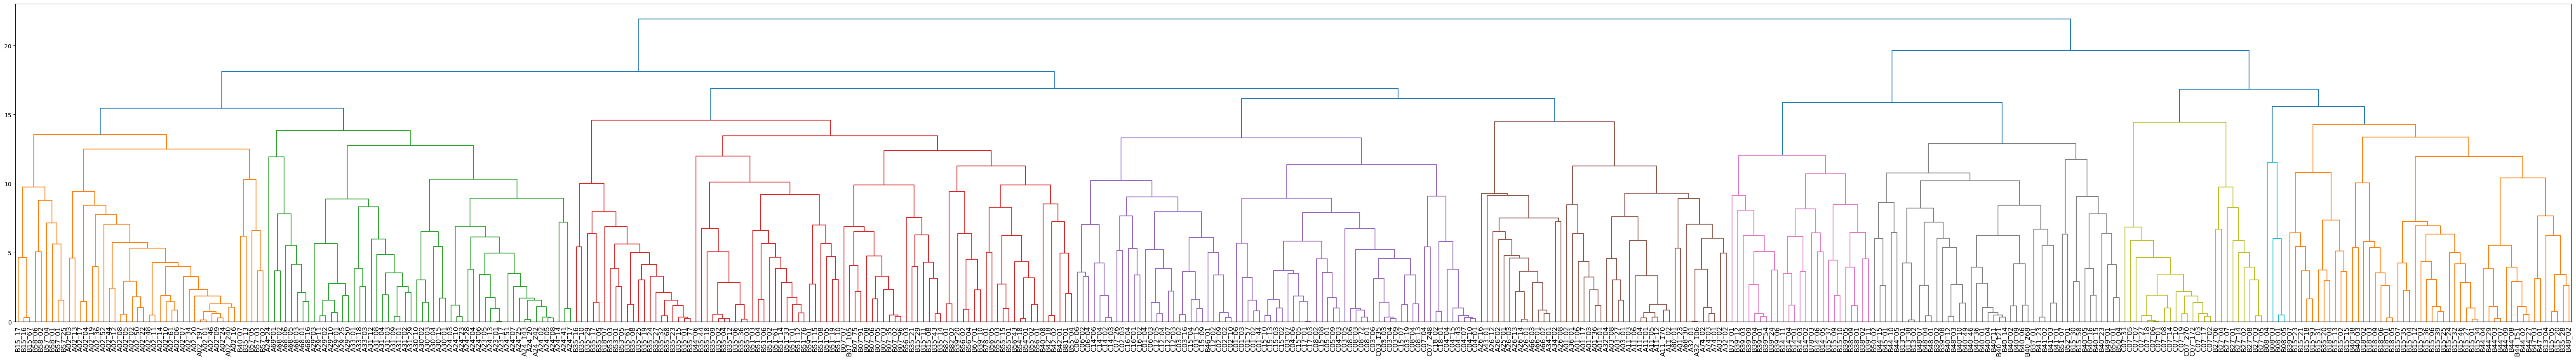

In [56]:
Mat = pd.read_csv("HLA-I_cf_relaxed.csv", index_col=0)
cluster, order = hierarchical_cluster(Mat, N=19, L='complete', color_threshold=None, plot_dendro=True, outtree="Fig4_cf_relaxed.newick")

name_order = Mat.index[order].to_list()
group_dict = cluster.to_dict()

full_CG_order = []
temp_group = None
last_group = -1
for name in name_order:
    if group_dict[name] != last_group:
        temp_group = []
        full_CG_order.append(temp_group)

    temp_group.append(name)
    last_group = group_dict[name]

# print(full_CG_order)

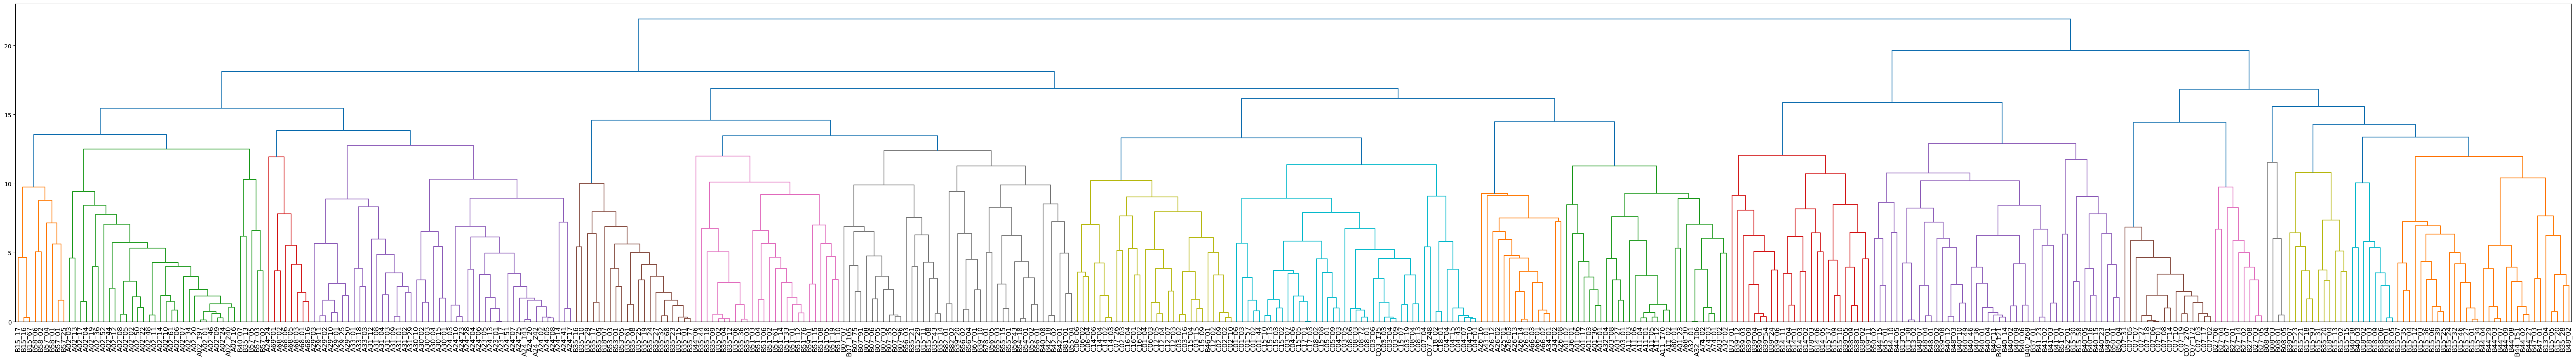

In [57]:
Mat = pd.read_csv("HLA-I_cf_relaxed.csv", index_col=0)
_ = hierarchical_cluster(Mat, N=19, L='complete', color_threshold=13, plot_dendro=True)

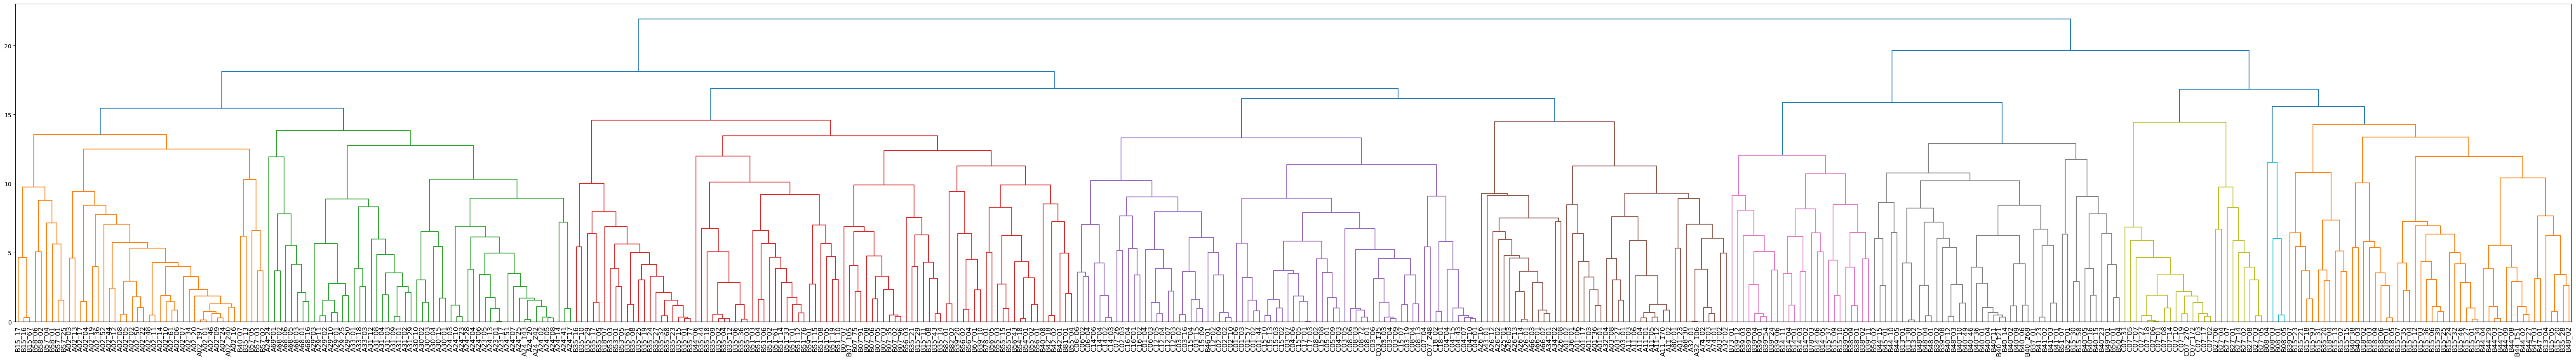

In [73]:
cluster, order = hierarchical_cluster(Mat, N=10, L='complete', color_threshold=None, plot_dendro=True)
name_order = Mat.index[order].to_list()
group_dict = cluster.to_dict()

full_CG_order = []
temp_group = None
last_group = -1
for name in name_order:
    if group_dict[name] != last_group:
        temp_group = []
        full_CG_order.append(temp_group)

    temp_group.append(name)
    last_group = group_dict[name]

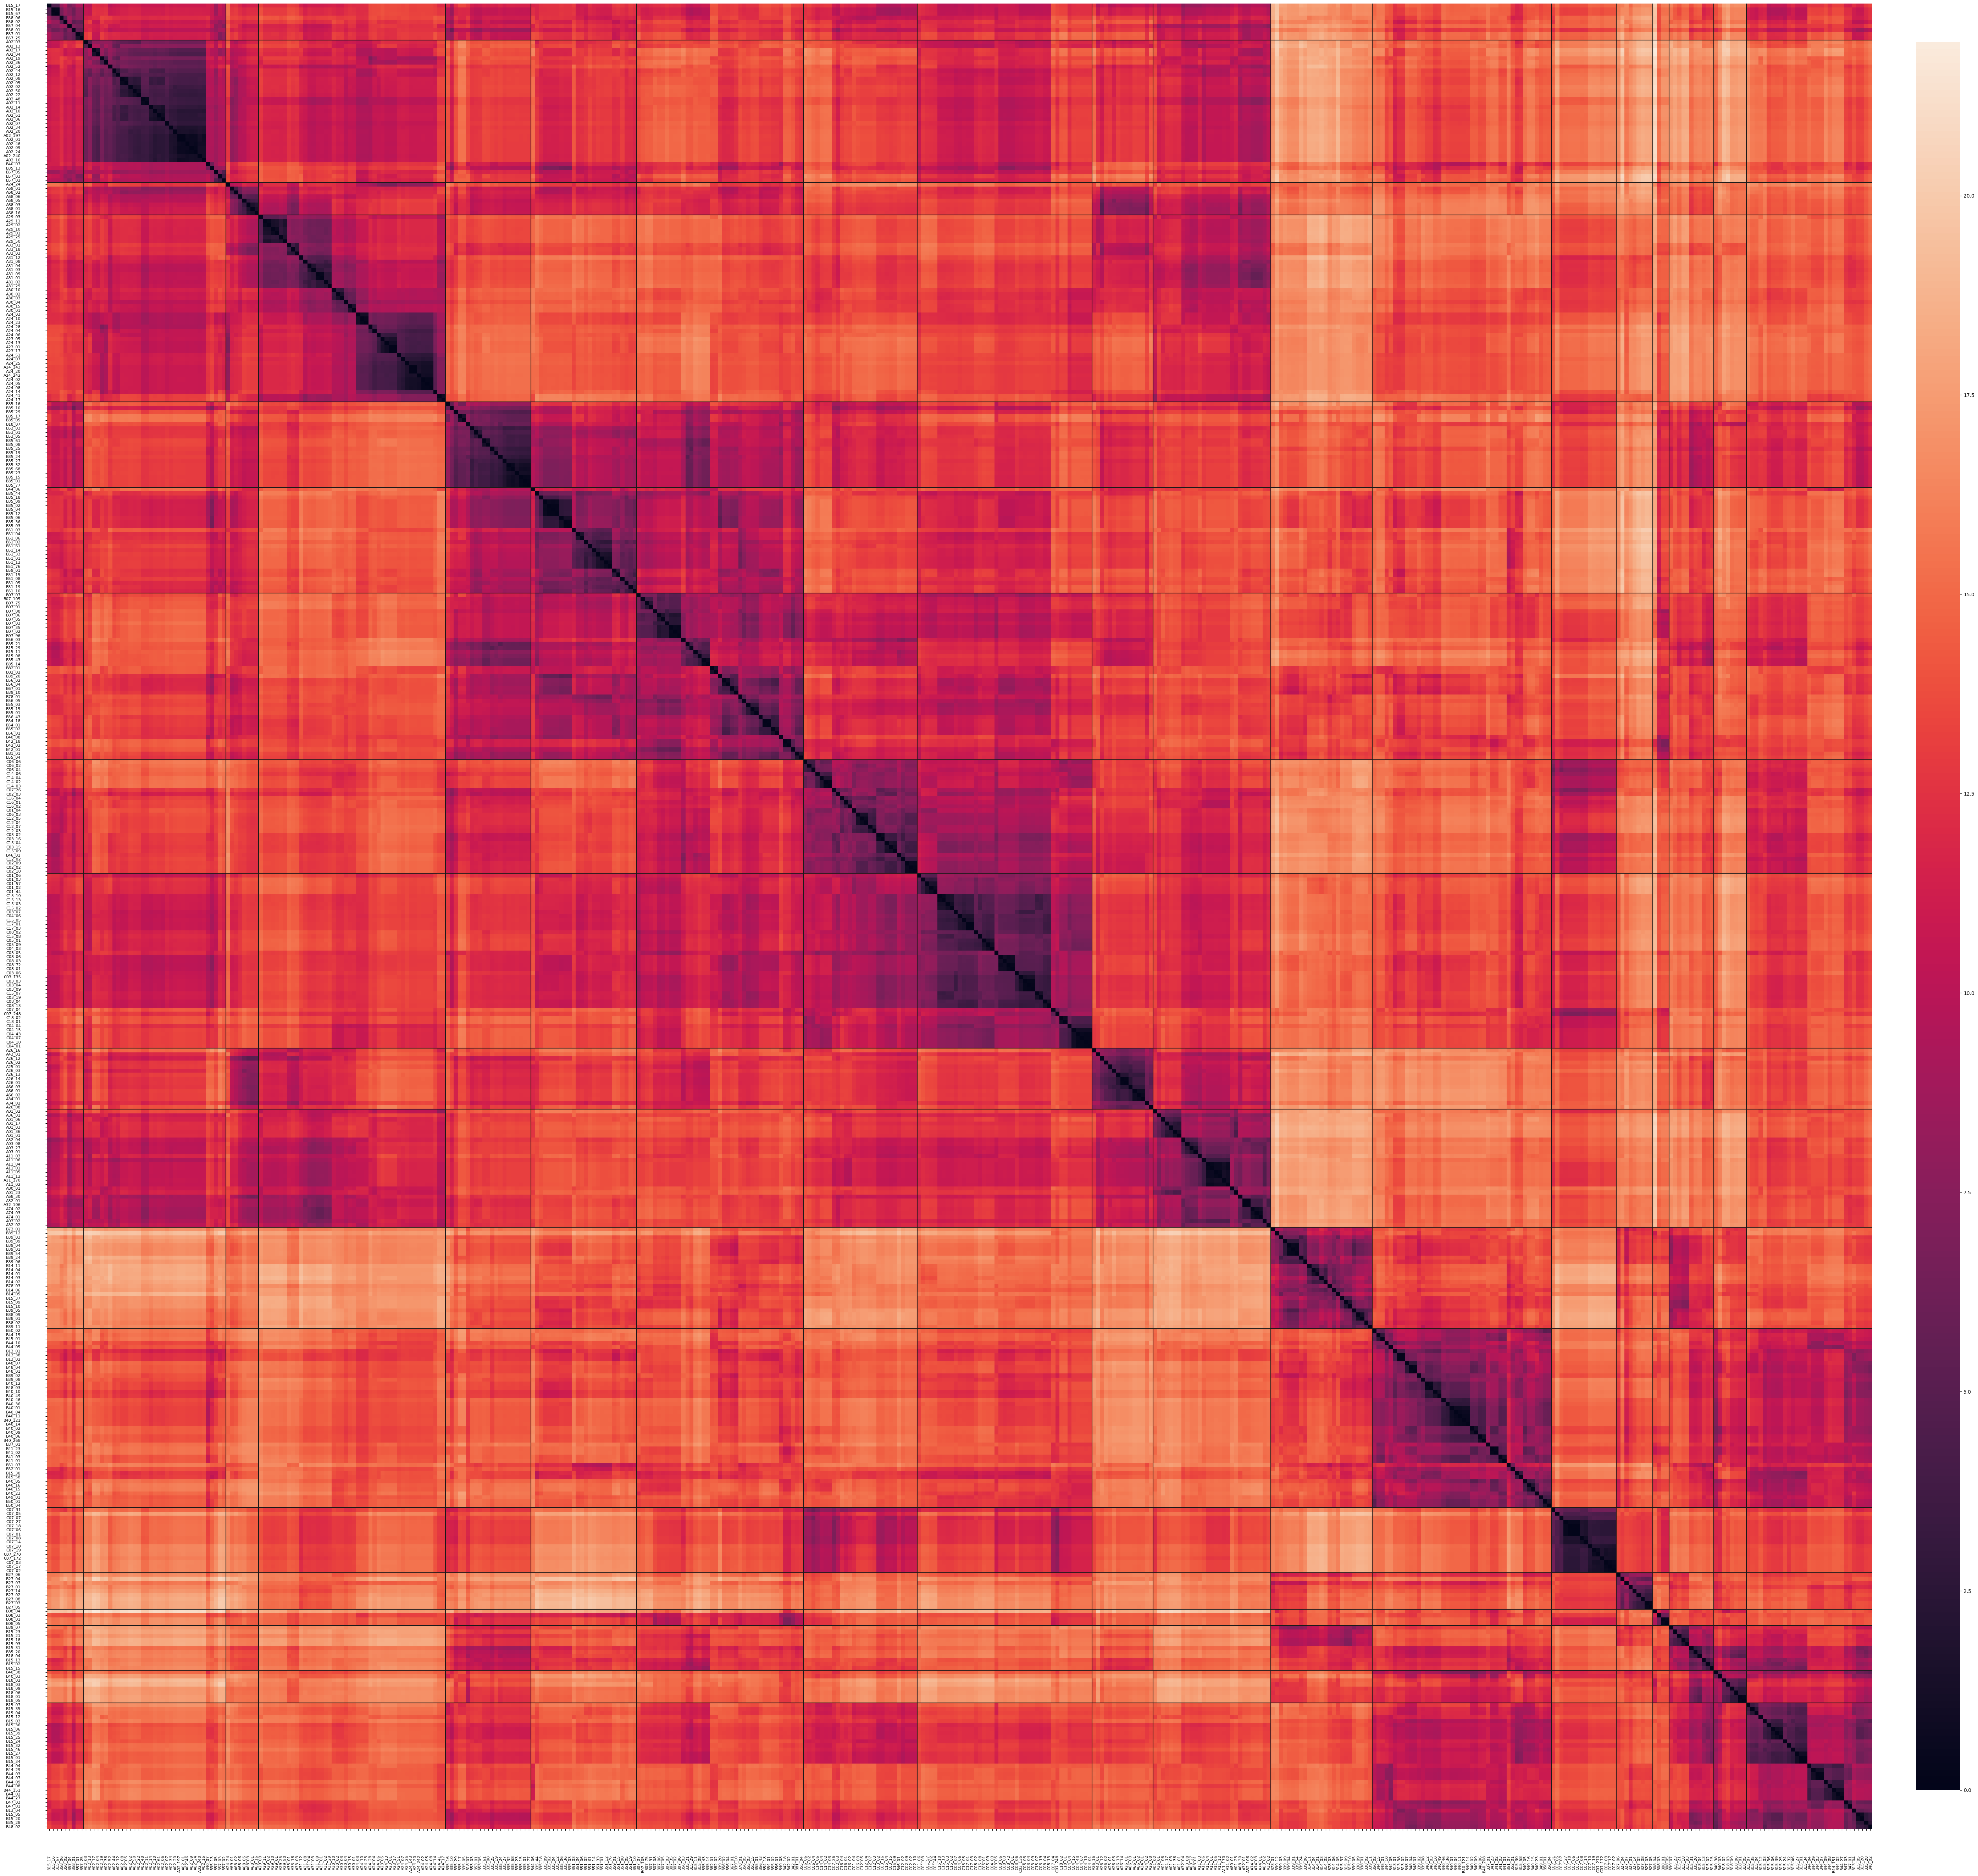

In [65]:
heatmap(Mat, order=full_CG_order, size=(80,80), line=True, shrink=0.8, aspect=40, pad=0.02, label=True)

In [74]:
full_CG_order

[['B15_17',
  'B15_16',
  'B15_67',
  'B58_06',
  'B58_02',
  'B57_04',
  'B58_01',
  'B57_01',
  'B57_25',
  'A02_03',
  'A02_13',
  'A02_17',
  'A02_04',
  'A02_19',
  'A02_36',
  'A02_52',
  'A02_44',
  'A02_12',
  'A02_08',
  'A02_05',
  'A02_02',
  'A02_50',
  'A02_22',
  'A02_48',
  'A02_11',
  'A02_14',
  'A02_10',
  'A02_61',
  'A02_06',
  'A02_07',
  'A02_34',
  'A02_20',
  'A02_197',
  'A02_01',
  'A02_46',
  'A02_09',
  'A02_24',
  'A02_240',
  'A02_16',
  'B40_07',
  'B35_13',
  'B57_05',
  'B57_03',
  'B57_02'],
 ['A24_24',
  'A69_01',
  'A68_02',
  'A68_06',
  'A68_05',
  'A68_03',
  'A68_01',
  'A68_16',
  'A29_03',
  'A29_11',
  'A29_02',
  'A29_10',
  'A29_01',
  'A29_25',
  'A29_50',
  'A33_01',
  'A33_18',
  'A33_03',
  'A31_12',
  'A31_08',
  'A31_04',
  'A31_03',
  'A31_09',
  'A31_01',
  'A31_02',
  'A31_29',
  'A30_10',
  'A30_02',
  'A30_03',
  'A30_04',
  'A30_15',
  'A30_01',
  'A24_03',
  'A24_10',
  'A24_23',
  'A24_28',
  'A24_04',
  'A24_06',
  'A23_05',
 